# 量化噪声

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

In [8]:
read = np.random.uniform(low=0, high=0.1, size=1000000)
e = np.diff(read)

<AxesSubplot:ylabel='Density'>

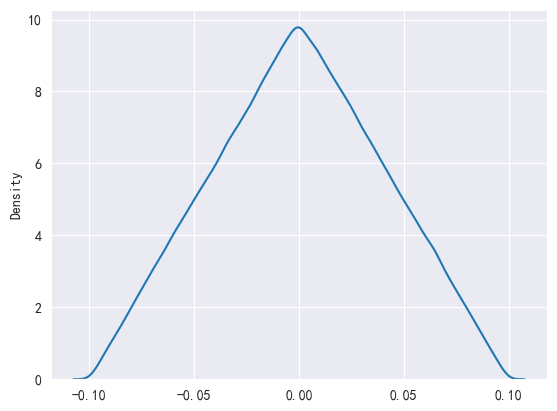

In [9]:
# 量化噪声的分布(相邻均匀分布采样点的差的分布)
sns.kdeplot(e)

In [63]:
np.random.seed(666)
read = np.random.uniform(low=1, high=10, size=10000)
q = np.diff(read)

In [64]:
base_var = np.std(q) ** 2
base_var

13.589540697389694

In [99]:
def slide_read(x, step=10):
    roll_x = np.roll(x, step)
    res = x - roll_x
    return res[step:] / step

def slide(x, step=10):
    cum = np.cumsum(x)
    cum = np.insert(cum, 0, 0)
    roll_cum = np.roll(cum, step)
    res = cum - roll_cum
    return res[step:] / step

In [66]:
q_slide = slide_read(read, step=20)
slide_var = np.std(q_slide) ** 2
slide_var

0.034206010102380904

In [67]:
base_var / slide_var

397.28517464373306

结论：滑窗k点，量化噪声方差降低k^2

# 随机噪声

In [68]:
np.random.seed(666)
rn = np.random.normal(10, 2, 10000)

In [69]:
base_var = np.std(rn) ** 2
base_var

3.9937047148542857

In [70]:
rn_slide = slide(rn, step=10)
slide_var = np.std(rn_slide) ** 2
slide_var

0.3921237367330315

In [71]:
base_var / slide_var

10.184807347108672

结论：滑窗k点，随机噪声方差降低k

# 连续信号

In [112]:
x = np.linspace(0, 6, 10000)
con = np.sin(x)

In [113]:
base_var = np.std(con) ** 2
base_var

0.5222649974147592

In [114]:
con_slide = slide(con, step=10)
slide_var = np.std(con_slide) ** 2
slide_var

0.5226967631017957

In [115]:
base_var / slide_var

0.9991739652557358

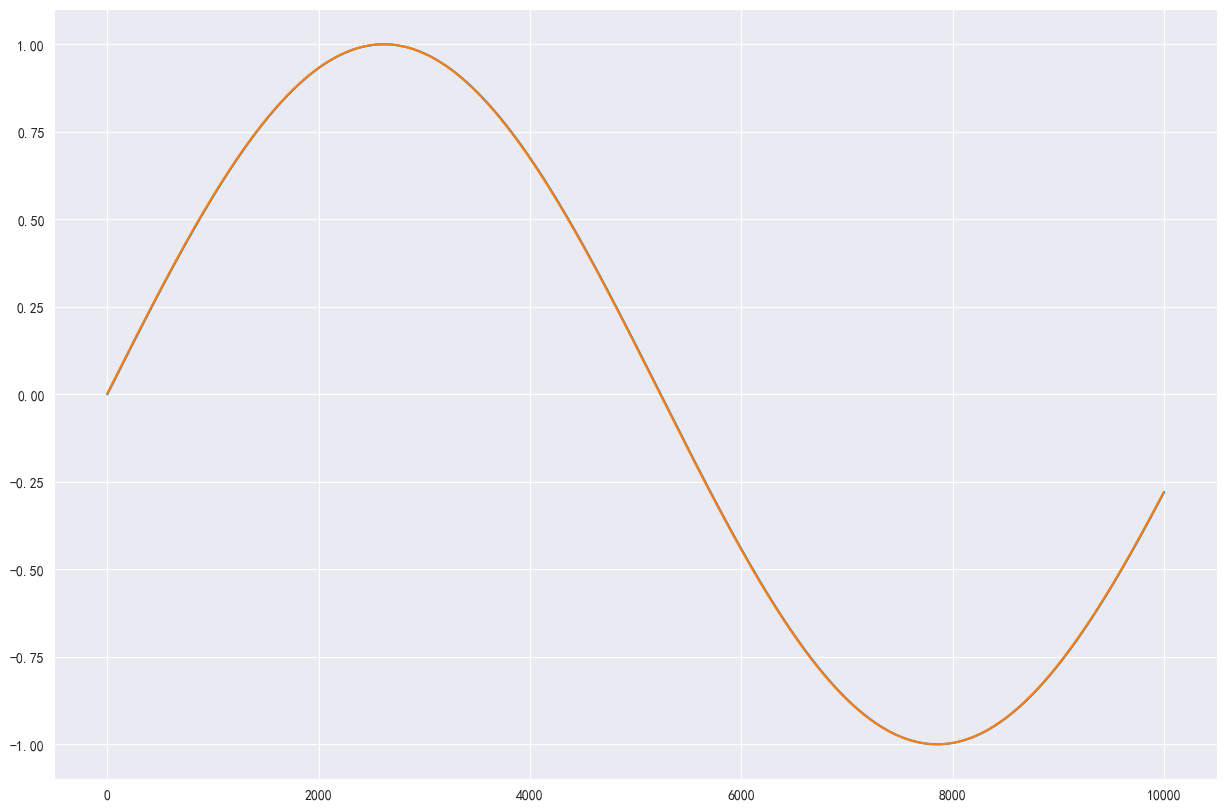

In [116]:
plt.figure(figsize=(15, 10))
plt.plot(con)
plt.plot(con_slide)

结论：滑窗k点，连续信号（相邻采样点足够接近）方差不变